In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from matplotlib.cm import rainbow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir('/content/drive/My Drive/ML')
os.listdir('.')
file_exists = os.path.isfile('housing.csv')
file_exists

True

In [ ]:
file_housing = 'housing.csv'
dataset_housing = pd.read_csv(file_housing)
dataset_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
dataset_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
dataset_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---

Data contains;

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000s

In [ ]:
dataset_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
dataset_housing.medv.value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: medv, Length: 229, dtype: int64

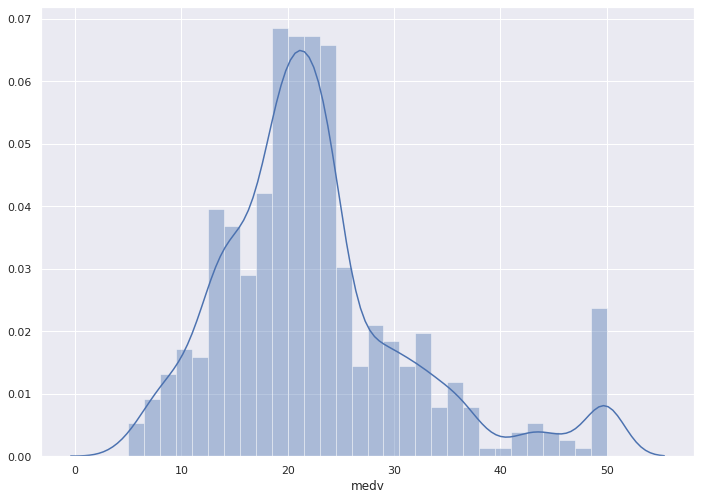

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset_housing['medv'], bins=30)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3cd318780>,
      dtype=object)

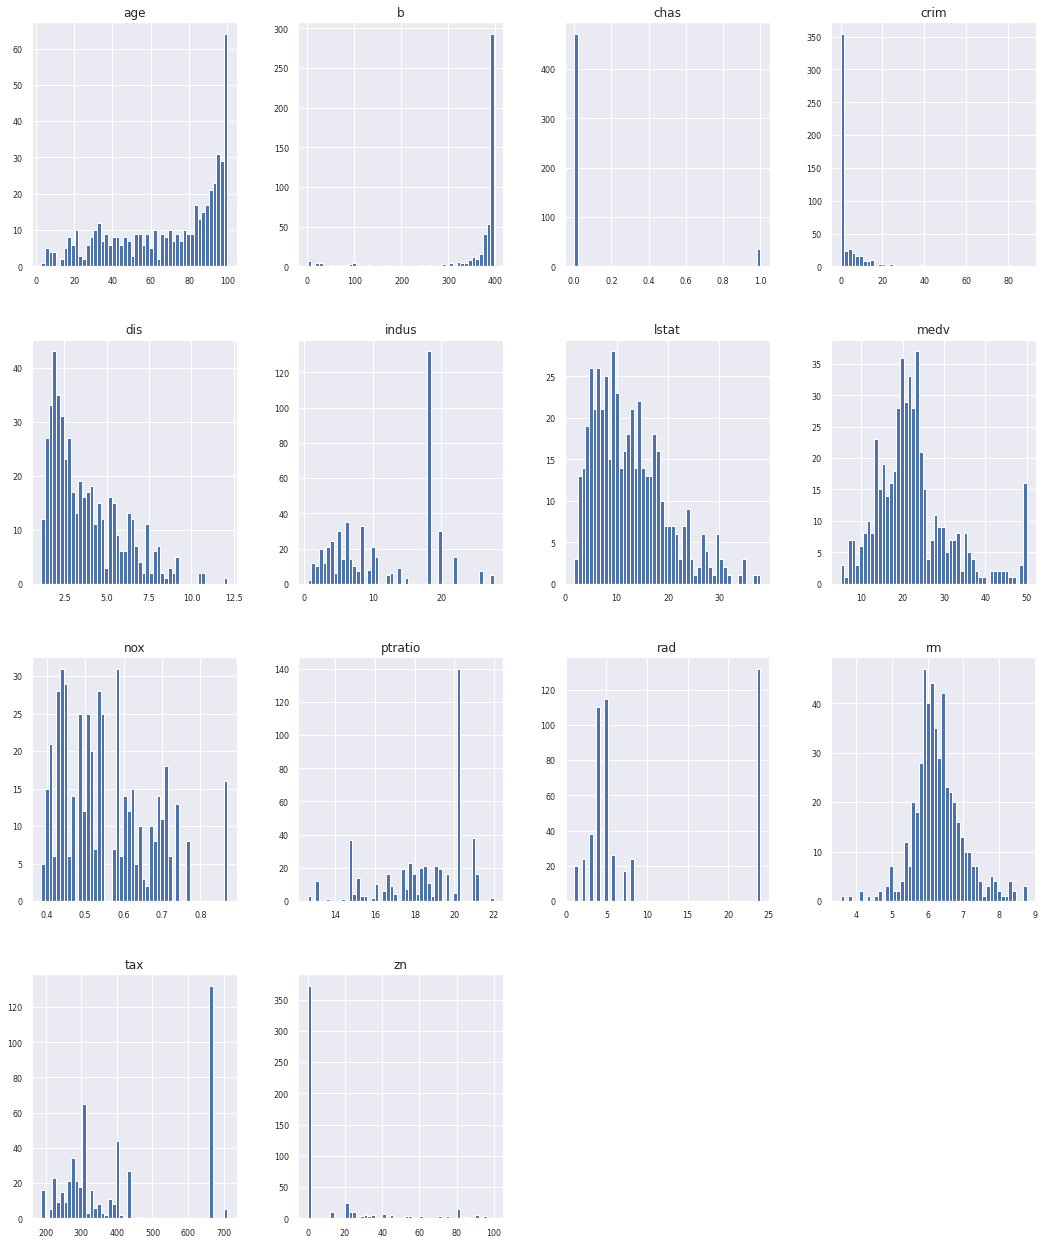

In [ ]:
dataset_housing.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

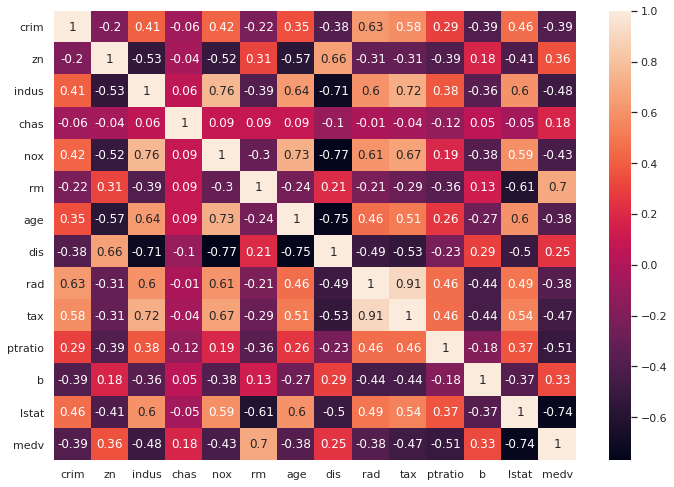

In [ ]:
correlation_matrix = dataset_housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)



---
Data Processing


---



Standard Scaler

In [ ]:
standardscaler = preprocessing.StandardScaler()

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_standardscaler = standardscaler.fit_transform(feature.values)
label_standardscaler = standardscaler.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_standardscaler, label_standardscaler, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)

mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Standard Scaler :', mse)
print('MAE Standard Scaler :',  mae)
print('R2 Standard Scaler  :', r2)
print('RMSE Standard Scaler:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Standard Scaler : 0.3843011995466092
MAE Standard Scaler : 0.41981890085649826
R2 Standard Scaler  : 0.6745585065949401
RMSE Standard Scaler: 0.6199203170945514


Yeo Johnson

In [ ]:
jon = preprocessing.PowerTransformer(method='yeo-johnson')

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_jon = jon.fit_transform(feature.values)
label_jon = jon.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_jon, label_jon, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Yeo Jhonson :', mse)
print('MAE Yeo Jhonson :',  mae)
print('R2 Yeo Jhonson  :', r2)
print('RMSE Yeo Jhonson:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Yeo Jhonson : 0.23769730132818268
MAE Yeo Jhonson : 0.3507403782365354
R2 Yeo Jhonson  : 0.7659515234483079
RMSE Yeo Jhonson: 0.48754210210830273



Box Cox Transformation

In [ ]:
box = PowerTransformer(method='box-cox')

feature_box = box.fit_transform(feature.values)
label_box = box.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()


ValueError: ignored

Quantile Transformer

In [ ]:
q = preprocessing.QuantileTransformer()

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_q = q.fit_transform(feature.values)
label_q = q.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_q, label_q, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [ ]:
print('MSE Quantile :', mse)
print('MAE Quantile :',  mae)
print('R2 Quantile  :', r2)
print('RMSE Quantile:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Quantile : 0.019345287469047092
MAE Quantile : 0.10327402610232495
R2 Quantile  : 0.7677708183981817
RMSE Quantile: 0.13908733755826622


MinMaxScaler

In [ ]:
min = preprocessing.MinMaxScaler()

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_min = min.fit_transform(feature.values)
label_min = min.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_min, label_min, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Min Max Scaler :', mse)
print('MAE Min Max Scaler :',  mae)
print('R2 Min Max Scaler  :', r2)
print('RMSE Min Max Scaler:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Min Max Scaler : 0.016021005775805796
MAE Min Max Scaler : 0.08571779795545566
R2 Min Max Scaler  : 0.6745585065949402
RMSE Min Max Scaler: 0.1265741117914947


MaxAbsScaler

In [ ]:
max = preprocessing.MaxAbsScaler()

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_max = max.fit_transform(feature.values)
label_max = max.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_max, label_max, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Max Abs Scaler :', mse)
print('MAE Max Abs Scaler :',  mae)
print('R2 Max Abs Scaler  :', r2)
print('RMSE Max Abs Scalerr:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Max Abs Scaler : 0.012977014678402685
MAE Max Abs Scaler : 0.07714601815991037
R2 Max Abs Scaler  : 0.6745585065949404
RMSE Max Abs Scalerr: 0.11391670061234518


RobustScaler

In [ ]:
robust = preprocessing.RobustScaler()

feature = dataset_housing.drop(['medv'], axis = 1)
label = dataset_housing['medv']

feature_robust = robust.fit_transform(feature.values)
label_robust = robust.fit_transform(dataset_housing['medv'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_robust, label_robust, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Robust Scaler :', mse)
print('MAE Robust Scaler :',  mae)
print('R2 Robust Scaler  :', r2)
print('RMSE Robust Scaler:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Robust Scaler : 0.5100977654859004
MAE Robust Scaler : 0.4836740950464587
R2 Robust Scaler  : 0.6745585065949404
RMSE Robust Scaler: 0.7142112891056122


Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators= 150, max_depth = 100, random_state=10 )
rf.fit(feature_train, label_train)
predict = rf.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.1413004997745887
MAE Random Forest : 0.27551370965467153
R2 Random Forest  : 0.8608685646684113
RMSE Random Forest: 0.37589958735623624


KNN

In [ ]:
n = [1,3,5,7,9,11,13,15,17,19]
for index,i in enumerate (n):
  knn = KNeighborsRegressor(n_neighbors= i)
  knn.fit(feature_train, label_train)
  predict = knn.predict(feature_test)
  mse = mean_squared_error(label_test, predict)
  mae = mean_absolute_error(label_test, predict)
  r2 = r2_score(label_test, predict)
  print("MSE  = {} n_neighbors = {}".format(mse,i))
  print("MAE  = {} n_neighbors = {}".format(mae,i))
  print("R2   = {} n_neighbors = {}".format(r2,i))
  print('RMSE  = {} n_neighbors = {} \n'.format(np.sqrt(mean_squared_error(label_test, predict)),i))

MSE  = 0.26566330698796586 n_neighbors = 1
MAE  = 0.3560086991191501 n_neighbors = 1
R2   = 0.7384148161178734 n_neighbors = 1
RMSE  = 0.5154253650995126 n_neighbors = 1 

MSE  = 0.22990211772686747 n_neighbors = 3
MAE  = 0.34140279303496324 n_neighbors = 3
R2   = 0.7736270453668743 n_neighbors = 3
RMSE  = 0.47948109214740414 n_neighbors = 3 

MSE  = 0.2577469387933583 n_neighbors = 5
MAE  = 0.36089213388725566 n_neighbors = 5
R2   = 0.7462096623589421 n_neighbors = 5
RMSE  = 0.5076878359714346 n_neighbors = 5 

MSE  = 0.25287095471295395 n_neighbors = 7
MAE  = 0.3573124730304481 n_neighbors = 7
R2   = 0.7510107965717925 n_neighbors = 7
RMSE  = 0.5028627593220182 n_neighbors = 7 

MSE  = 0.24617095335490116 n_neighbors = 9
MAE  = 0.3685954077015292 n_neighbors = 9
R2   = 0.7576079480833339 n_neighbors = 9
RMSE  = 0.4961561783903342 n_neighbors = 9 

MSE  = 0.2584850790405555 n_neighbors = 11
MAE  = 0.3783217803721086 n_neighbors = 11
R2   = 0.7454828530961837 n_neighbors = 11
RMSE  = 0

SVR

In [ ]:
kernel = ['linear','rbf','poly','sigmoid']
for index, i in enumerate (kernel):
  svr = SVR(kernel = i)
  svr.fit(feature_train, label_train)
  mse = mean_squared_error(label_test, predict)
  mae = mean_absolute_error(label_test, predict)
  r2 = r2_score(label_test, predict) 
  print("MSE Random Forest = {} kernel = {}".format(mse,i))
  print("MAE Random Forest = {} kernel = {}".format(mae,i))
  print("R2 Random Forest  = {} kernel = {}".format(r2,i))
  print('RMSE Random Forest = {} kernel = {} \n'.format(np.sqrt(mean_squared_error(label_test, predict)),i))

MSE Random Forest = 0.1413004997745887 kernel = linear
MAE Random Forest = 0.27551370965467153 kernel = linear
R2 Random Forest  = 0.8608685646684113 kernel = linear
RMSE Random Forest = 0.37589958735623624 kernel = linear 

MSE Random Forest = 0.1413004997745887 kernel = rbf
MAE Random Forest = 0.27551370965467153 kernel = rbf
R2 Random Forest  = 0.8608685646684113 kernel = rbf
RMSE Random Forest = 0.37589958735623624 kernel = rbf 

MSE Random Forest = 0.1413004997745887 kernel = poly
MAE Random Forest = 0.27551370965467153 kernel = poly
R2 Random Forest  = 0.8608685646684113 kernel = poly
RMSE Random Forest = 0.37589958735623624 kernel = poly 

MSE Random Forest = 0.1413004997745887 kernel = sigmoid
MAE Random Forest = 0.27551370965467153 kernel = sigmoid
R2 Random Forest  = 0.8608685646684113 kernel = sigmoid
RMSE Random Forest = 0.37589958735623624 kernel = sigmoid 

